In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

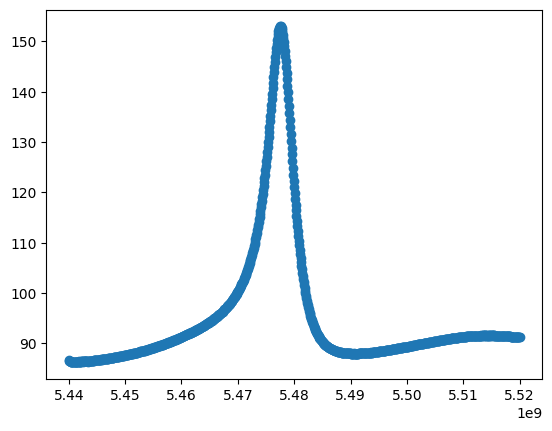

In [2]:
# Read data 
path = '../Data/fit_test/Resonances/20mK_-5dBm.txt'
raw_data = np.loadtxt(path, delimiter=' ', skiprows=0)
transmission_squared_data = raw_data[:,1]**2

plt.plot(raw_data[:,0], transmission_squared_data, 'o')

In [3]:
def transmission_squared(f, A1, A2, A3, A4, fr, Qr):
    delta_f = f - fr
    return A1 + A2 * delta_f + (A3 + A4 * delta_f) / (1 + 4 * Qr**2 * (delta_f / fr)**2)


# Chi-square cost function for iminuit
def chi_square(A1, A2, A3, A4, fr, Qr):
    model = transmission_squared(f, A1, A2, A3, A4, fr, Qr)
    residuals = (transmission_squared_data - model)
    # We dont have any information about the error of the data points
    transmission_squared_data_error = np.ones_like(transmission_squared_data)
    chi2 = np.sum((residuals / transmission_squared_data_error)**2)
    return chi2

In [4]:
# Fit data
A1_init = 1
A2_init = 1
A3_init = 1
A4_init = 1
fr_init = 5.477e9
Qr_init = 900

p0 = [A1_init, A2_init, A3_init, A4_init, fr_init, Qr_init]

f = raw_data[:,0]

popt, pcov = curve_fit(transmission_squared, f, transmission_squared_data, p0=p0)
popt

array([ 8.84362918e+01,  1.14882494e-07,  6.26807624e+01, -7.77889029e-06,
        5.47808711e+09,  1.00365205e+03])

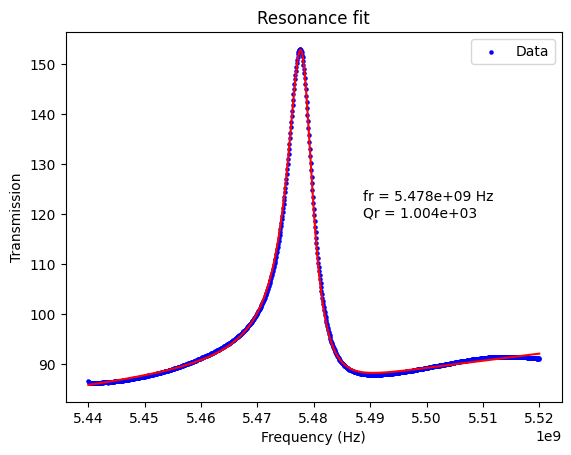

In [15]:
# Plot fit
plt.plot(f, transmission_squared(f, *popt), 'r')
plt.scatter(f, transmission_squared_data, c='b', s=5, label='Data')
# Add text to say fr and Qr and their errors
plt.text(0.6, 0.5, 'fr = {:.3e} Hz\nQr = {:.3e}'.format(popt[4], popt[5]), transform=plt.gca().transAxes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission')
plt.title('Resonance fit')
plt.legend()
plt.show()

In [5]:
from iminuit import Minuit

f = raw_data[:,0]

# Initial parameter guesses
A1_init, A2_init, A3_init, A4_init, fr_init, Qr_init = 1, 1, 1, 1, 5.477e9, 900

# Initialize Minuit
minuit = Minuit(chi_square, A1=A1_init, A2=A2_init, A3=A3_init, A4=A4_init, fr=fr_init, Qr=Qr_init)

# Fit using Minuit
minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 136.4                      │             Nfcn = 1358              │
│ EDM = 8.51e-07 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A1   │   88.44   │   0.04    │            │            │         │         │       │
│ 1 │ A2   │ 114.9e-9  │  1.8e-9   │            │            │         │         │       │
│ 2 │ A3   │   62.68   │   0.20    │            │            │         │         │       │
│ 3 │ A4   │ -7.78e-6  │  0.10e-6  │            │            │         │         │       │
│ 4 │ fr   │5.478087e9 │0.000013e9 │            │            │         │         │       │
│ 5 │ Qr   │  1.004e3  │  0.005e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │                  A1                  A2                  A3                  A4                  fr                  Qr │
├────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ A1 │             0.00158      -6.7361593e-12             -0.0008        -1.117973e-9             67.7092              0.0793 │
│ A2 │      -6.7361593e-12            3.18e-18     -84.6689446e-12           -87.6e-18 10.8531204392083e-6    -1.8310923685e-9 │
│ A3 │             -0.0008     -84.6689446e-12              0.0412        -237.964e-12             -968.99                0.56 │
│ A4 │        -1.117973e-9           -87.6e-18        -237.964e-12             1.1e-14   -968.136301636e-6      -190.638281e-9 │
│ fr │             67.7092 10.8531204392083e-6             -968.99   -968.136301636e-6             1.8e+08            -5.569e3 │
│ Qr │              0.0793    -1.8310923685e-9                0.56      -190.638281e-9            -5.569e3                  22 │
└────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

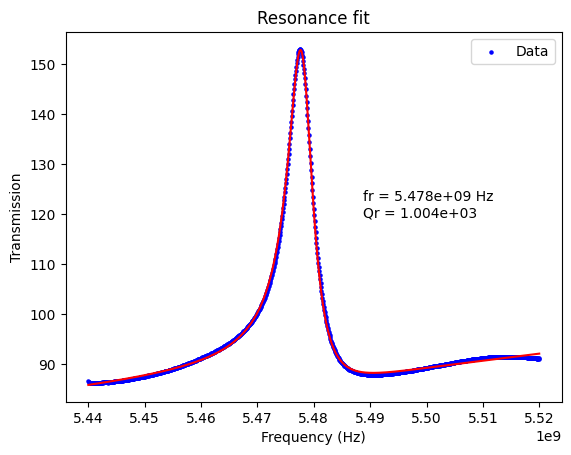

In [6]:
# Extract fit parameters
best_fit_params = minuit.values
best_fit_params_dict = best_fit_params.to_dict()
params_list = list(best_fit_params_dict.values())

# Plot fit
plt.plot(f, transmission_squared(f, *params_list), 'r')
plt.scatter(f, transmission_squared_data, c='b', s=5, label='Data')
# Add text to say fr and Qr and their errors
plt.text(0.6, 0.5, 'fr = {:.3e} Hz\nQr = {:.3e}'.format(best_fit_params_dict['fr'], best_fit_params_dict['Qr']), transform=plt.gca().transAxes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission')
plt.title('Resonance fit')
plt.legend()
plt.show()

## Testing the fitting library

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from fitting import fit_S21, plot_fit, get_fit_params_list

In [6]:
path = '../Data/fit_test/Resonances/20mK_-15dBm.txt'
data = np.loadtxt(path, delimiter=' ', skiprows=0)
f = data[:,0]
y = data[:,1]

# Convert to linear scale
y = 10**(y/20)

# Fit data
minuit_res = fit_S21(f, y)

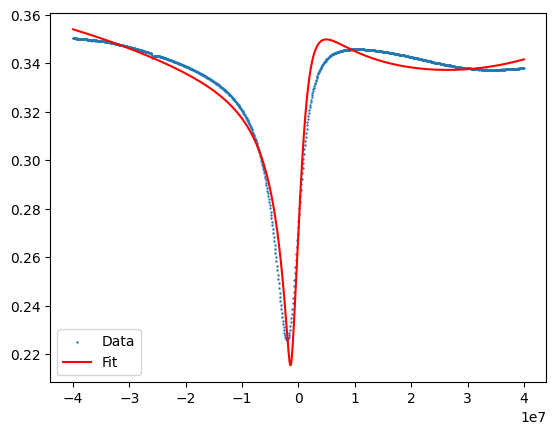

In [7]:
# Plot fit
x = f.copy()
x -= x[len(x)//2]
#x /= np.max(np.abs(x))
#y /= np.max(y)
plot_fit(minuit_res, x, y, s=2, marker='.')

In [4]:
minuit_res

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.953                      │             Nfcn = 1887              │
│ EDM = 605 (Goal: 0.0002)         │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f0   │  5.28e6   │  0.08e6   │            │            │         │         │       │
│ 1 │ phi  │    -76    │    11     │            │            │         │         │       │
│ 2 │ Qt   │   0.7e3   │   0.4e3   │            │            │   600   │  1400   │       │
│ 3 │ Qc   │   0.6e3   │   0.6e3   │            │            │   600   │  1400   │       │
│ 4 │ B    │  1.2e-9   │  3.0e-9   │            │            │         │         │       │
│ 5 │ C    │ 0.06e-15  │ 0.08e-15  │            │            │         │         │       │
│ 6 │ D    │ -1.4e-24  │  2.8e-24  │            │            │         │         │       │
│ 7 │ K    │   0.92    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │                                  f0                                 phi                                  Qt                                  Qc                                   B                                   C                                   D                                   K │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  f0 │                            6.81e+09                           -786.60e3                              0.50e9                             0.187e9                  13.523898323666e-6         3.669797702273092099290e-12 -15.775317445020116124965170457e-21                         -3.427174e3 │
│ phi │                           -786.60e3                                 119                            -50.33e3                            -37.20e3                     -5.489123621e-9            -336.233892114533830e-18      5.175200130756284266908551e-24                               0.315 │
│  Qt │                              0.50e9                            -50.33e3                            4.22e+07                             0.012e9                  -1.381110835624e-6          327.800302408000732157e-15    866.010023429311786458129063e-24                            -305.842 │
│  Qc │                             0.187e9                            -37.20e3                             0.012e9                            1.72e+07                   1.111985380575e-6           85.5868894

## Fit with real and imm parts

In [5]:
import numpy as np
from matplotlib import pyplot as plt


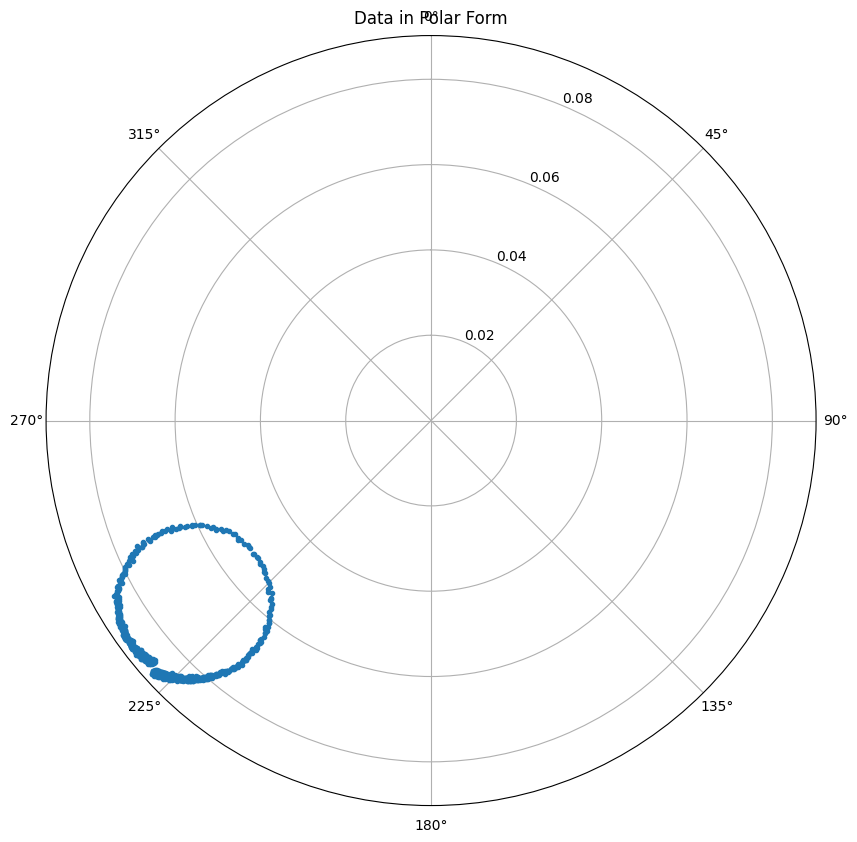

In [123]:
# Load data
data_path = '../Data/fit_test/Q_res20.txt'
data = np.loadtxt(data_path, delimiter=',', skiprows=0) # freq, real, imag

# Cable delay correction
cable_phase_factors = np.exp(-1j * 2 * np.pi * data[:,0] * 30e-9)  # 30 ns delay
complex_data = data[:,1] + 1j * data[:,2]
complex_data = complex_data / cable_phase_factors


# Convert complex coordinates to polar form (magnitude and angle)
r_values = np.abs(complex_data)  # Magnitude
theta = np.angle(complex_data)  # Angle

# Create polar plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.plot(theta, r_values, '.')  # Plot points in polar coordinates
ax.set_title('Data in Polar Form', va='bottom')

# Additional aesthetic settings for matching your provided plot style
ax.grid(True)
ax.set_theta_zero_location('N')  # Set the zero of the theta direction (north)
ax.set_theta_direction(-1)  # Set the direction of increasing theta (clockwise)

# Optional: set the radial limits if necessary
# ax.set_rlim(0, np.max(r))

plt.show()

0.0003197881921797354


C:\Users\kid\AppData\Local\Temp\ipykernel_16824\2002340543.py:46: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  A = fsolve(cherno_lesort_fit, initial_guess, args=(B, M, eta))


Center of circle: (-0.29554248051988563, -0.372099623311297)
Radius of circle: 0.4798103863209311


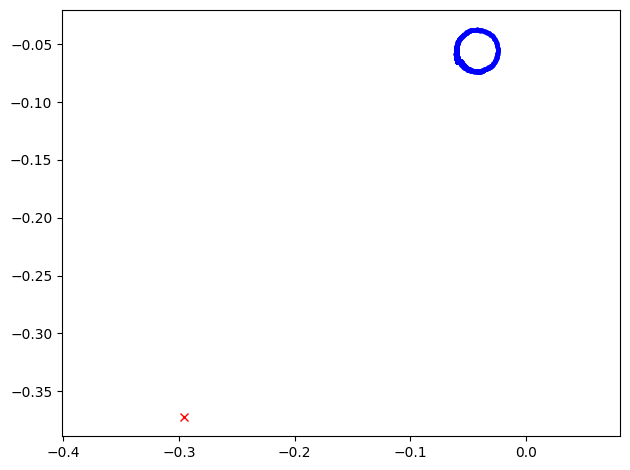

In [166]:
# Chernov-Lesort fit ----------------

# B matrix
B = np.array([
    [0, 0, 0, -2],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [-2, 0, 0, 0]
])

# M matrix
w = np.abs(complex_data)
x = np.real(complex_data)
y = np.imag(complex_data)
M_ab = lambda a, b: np.sum(a * b)
M = np.array([
    [M_ab(w, w), M_ab(x, w), M_ab(y, w), M_ab(w, np.ones_like(w))],
    [M_ab(w, x), M_ab(x, x), M_ab(y, x), M_ab(x, np.ones_like(x))],
    [M_ab(w, y), M_ab(x, y), M_ab(y, y), M_ab(y, np.ones_like(y))],
    [M_ab(w, np.ones_like(w)), M_ab(x, np.ones_like(x)), M_ab(y, np.ones_like(y)), len(w)]
])

def lagrange_det(eta, B, M):
    return np.linalg.det(M - eta * B)

# Find zeros of the determinant to find eta
from scipy.optimize import fsolve
eta = fsolve(lagrange_det, 0, args=(B, M))
eta = eta[0]
print(eta)

# Solve numerically: MA - eta*BA = 0 ( A = [A, B, C, D] )
# With constraint: B^2 + C^2 - 4AD = 1
def cherno_lesort_fit(A, B, M, eta):
    term1 = M @ A
    term2 = eta * B @ A
    return term1 - term2

def satisfy_constraint(A):
    # check if constraint is close enough to 1
    return np.isclose(np.abs(A[1])**2 + np.abs(A[2])**2 - 4 * A[0] * A[3], 1, atol=1e-3)

constraint_satisfied = False
while not constraint_satisfied:
    initial_guess = np.random.rand(4, 1)  # Random initial guess
    A = fsolve(cherno_lesort_fit, initial_guess, args=(B, M, eta))
    constraint_satisfied = satisfy_constraint(A)

# Compute circle parameters
x_c = -A[1] / (2 * A[0])
y_c = -A[2] / (2 * A[0])
r = 1 / (2 * np.abs(A[0]))

print('Center of circle: ({}, {})'.format(x_c, y_c))
print('Radius of circle: {}'.format(r))

# Plot data and fit in polar coordinates
# plt.figure(figsize=(10, 10))
# ax = plt.subplot(111, polar=True)
# ax.plot(theta, r_values, '.')  # Plot points in polar coordinates
# # Plot fit
# theta_fit = np.linspace(0, 2*np.pi, 100)
# # circle_fit = r * np.exp(1j * theta_fit) + x_c + 1j * y_c
# # ax.plot(np.angle(circle_fit), np.abs(circle_fit), 'r')
# # Put a 'x' at the center of the circle
# center_of_circle = x_c + 1j * y_c
# plt.plot(np.angle(center_of_circle), np.abs(center_of_circle), 'rx')


plt.scatter(x, y, c='b', s=5, label='Data')
plt.plot(x_c, y_c, 'rx', label='Center of circle')
# set same aspect ratio
plt.axis('equal')
plt.tight_layout()


Eigenvalue (eta): 0.00031978819216674773
Eigenvector (A): [-0.72485936 -0.42845347 -0.53943979  0.00335446]
Circle Center: (-0.29554248051988985, -0.37209962331123075)
Radius: 0.4800325295168603


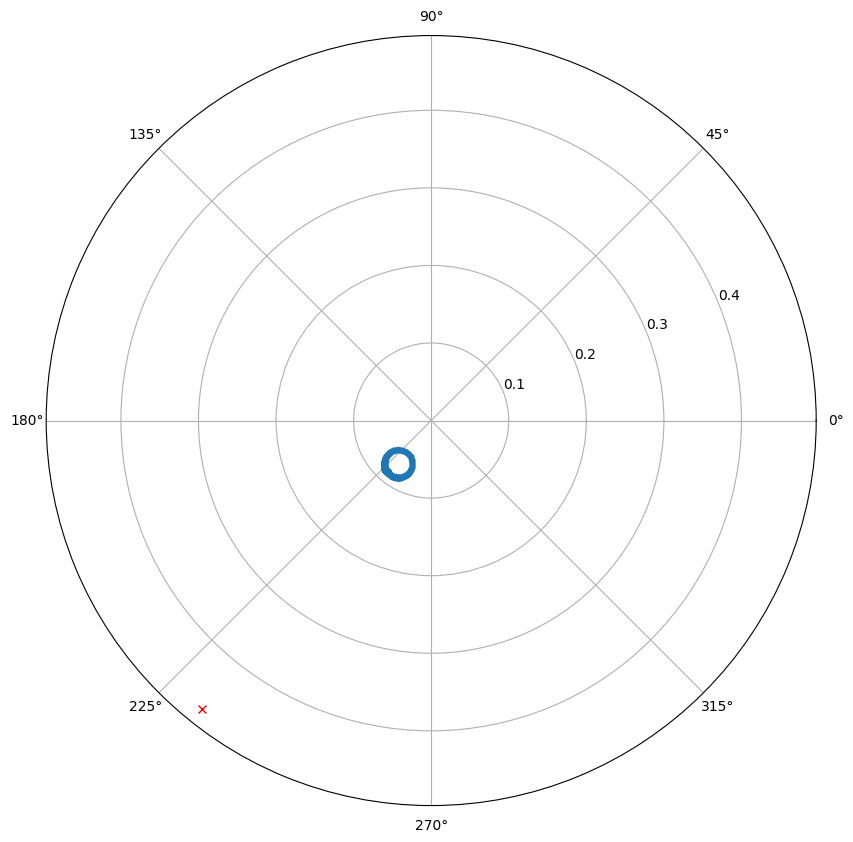

In [129]:
import numpy as np
from scipy.linalg import eig

# Ensure complex_data is defined as a NumPy array of complex numbers
# Example:
# complex_data = np.array([1+2j, 2+3j, 3+4j, ...])

# Chernov-Lesort fit ----------------

# B matrix
B = np.array([
    [0, 0, 0, -2],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [-2, 0, 0, 0]
])

# M matrix
w = np.abs(complex_data)
x = np.real(complex_data)
y = np.imag(complex_data)

def M_ab(a, b):
    return np.sum(a * b)

M = np.array([
    [M_ab(w, w), M_ab(x, w), M_ab(y, w), M_ab(w, np.ones_like(w))],
    [M_ab(w, x), M_ab(x, x), M_ab(y, x), M_ab(x, np.ones_like(x))],
    [M_ab(w, y), M_ab(x, y), M_ab(y, y), M_ab(y, np.ones_like(y))],
    [M_ab(w, np.ones_like(w)), M_ab(x, np.ones_like(x)), M_ab(y, np.ones_like(y)), len(w)]
])

# Solve the generalized eigenvalue problem M * A = eta * B * A
eigvals, eigvecs = eig(M, B)

# Filter out eigenvalues that are not real
real_indices = np.isreal(eigvals)
real_eigvals = eigvals[real_indices].real
real_eigvecs = eigvecs[:, real_indices].real

# Check if there are any real eigenvalues
if real_eigvals.size == 0:
    raise ValueError("No real eigenvalues found. Check the input data or matrices.")

# Select the eigenvalue with the smallest positive real part (or another criterion)
# Here, we select the eigenvalue with the smallest absolute value
eta_index = np.argmin(np.abs(real_eigvals))
eta = real_eigvals[eta_index]

# Extract the corresponding eigenvector
A = real_eigvecs[:, eta_index]

# Normalize the eigenvector (optional, for consistency)
A = A / np.linalg.norm(A)

print("Eigenvalue (eta):", eta)
print("Eigenvector (A):", A)

# Compute circle parameters based on the eigenvector A
# Assuming the circle equation: A0*(x^2 + y^2) + A1*x + A2*y + A3 = 0
A0, A1, A2, A3 = A

# Calculate the center of the circle
x_c = -A1 / (2 * A0)
y_c = -A2 / (2 * A0)

# Calculate the radius of the circle
# r = sqrt(x_c^2 + y_c^2 - A3 / A0)
radius_squared = x_c**2 + y_c**2 - (A3 / A0)
if radius_squared < 0:
    raise ValueError("Calculated radius squared is negative. Check the fitting results.")
r = np.sqrt(radius_squared)

print(f"Circle Center: ({x_c}, {y_c})")
print(f"Radius: {r}")

# Plot data and fit in polar coordinates
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.plot(theta, r_values, '.')  # Plot points in polar coordinates


center_of_circle = x_c + 1j * y_c
plt.plot(np.angle(center_of_circle), np.abs(center_of_circle), 'rx')
